In [1]:
import os
import pandas as pd
import numpy as np
import json
from google.colab import files
import io
from keras import layers
from keras import models
from keras import applications
from keras import optimizers
import keras

Using TensorFlow backend.


In [0]:
finalx=pd.read_csv('../content/data.csv')
finaly=np.loadtxt('../content/y', delimiter=',')
#valx=pd.read_csv('../content/valx.csv')
#valy=np.loadtxt('../content/valy', delimiter=',')

In [0]:
for i in range(31):
    finalx.iloc[:,i]=finalx.iloc[:,i]/finalx.iloc[:,i].max()

In [4]:
finalx=finalx.iloc[:100800,1:31]
finaly=finaly[:100800]
finalx=finalx.fillna(method='ffill')
x,y=finalx.shape
sam=finalx.values
out=pd.DataFrame(finaly)
out=out.values
out.shape
sam.shape

(100800, 30)

In [0]:
X=sam
X=X.reshape(int(len(out)/90),90,30)
Y=out
Y=Y.reshape(int(len(out)/90),90,1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
from keras.callbacks import EarlyStopping
from keras import regularizers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
checkpoint_path='/content/weights11.{epoch:02d}-{val_accuracy:.2f}.hdf5'
callbacks_list=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=False,save_best_only=True,monitor='val_accuracy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=20)

In [0]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D,Dropout,BatchNormalization,TimeDistributed
from keras.models import Model
import tensorflow as tf
from keras import layers

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=180,return_sequences=True,input_shape=(90,30),recurrent_dropout=0.2)))
#model.add(tf.keras.layers.Conv1D(filters=45,kernel_size=5,strides=1,activation='relu',padding='same'))
#model.add(tf.keras.layers.LSTM(units=45,return_sequences=True))
#model.add(tf.keras.layers.LSTM(units=45,return_sequences=True))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=180,return_sequences=True)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=180,return_sequences=True)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=180,activation='relu')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=45,activation='relu')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=1, activation='sigmoid')))

In [0]:
adam=tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
X_train=tf.convert_to_tensor(X_train, np.float32)
X_test=tf.convert_to_tensor(X_test, np.float32)
y_train=tf.convert_to_tensor(y_train, np.float32)
y_test=tf.convert_to_tensor(y_test, np.float32)

In [15]:
history=model.fit(X_train,y_train,epochs=500,batch_size=15,validation_data=(X_test,y_test),callbacks=[callbacks_list])

Epoch 1/500
60/60 [==============================] - 87s 1s/step - loss: 0.6433 - accuracy: 0.6247 - val_loss: 0.6666 - val_accuracy: 0.7127
Epoch 2/500
60/60 [==============================] - 85s 1s/step - loss: 0.5422 - accuracy: 0.6933 - val_loss: 0.6305 - val_accuracy: 0.6161
Epoch 3/500
60/60 [==============================] - 86s 1s/step - loss: 0.5072 - accuracy: 0.7201 - val_loss: 0.6207 - val_accuracy: 0.5552
Epoch 4/500
60/60 [==============================] - 86s 1s/step - loss: 0.4609 - accuracy: 0.7593 - val_loss: 0.5927 - val_accuracy: 0.6322
Epoch 5/500
60/60 [==============================] - 87s 1s/step - loss: 0.4380 - accuracy: 0.7721 - val_loss: 0.5152 - val_accuracy: 0.7743
Epoch 6/500
60/60 [==============================] - 86s 1s/step - loss: 0.3940 - accuracy: 0.8061 - val_loss: 0.3743 - val_accuracy: 0.7944
Epoch 7/500
60/60 [==============================] - 87s 1s/step - loss: 0.3830 - accuracy: 0.8119 - val_loss: 0.4502 - val_accuracy: 0.7304
Epoch 8/500
6

In [0]:
model.save('../content/wts.h5')

In [0]:
model=tf.keras.models.load_model('/content/weights11.296-0.95.hdf5')

In [23]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
l=y_pred.flatten()
q=[]
for i in l:
    if i>=0.5:
        q.append(1)
    else:
        q.append(0)
q=np.array(q)
#y_test=y_test.numpy()
#y_test=y_test.flatten()
tn, fp, fn, tp = confusion_matrix(y_test, q).ravel()
print(tn,tp,fn,fp)


9558 9604 656 342


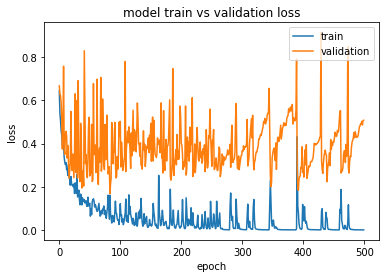

In [17]:
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

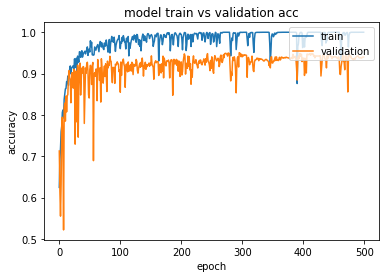

In [18]:
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation acc')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()